<a href="https://colab.research.google.com/github/SiyumiJayawardhane/Iris_Flower_Classification_ML_Project/blob/EDA-analysis/IFC_eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Load saved preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Projects/IFC/preprocessed_iris.csv')

<ipython-input-8-fcf97ada9c02>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Species'], palette='viridis')


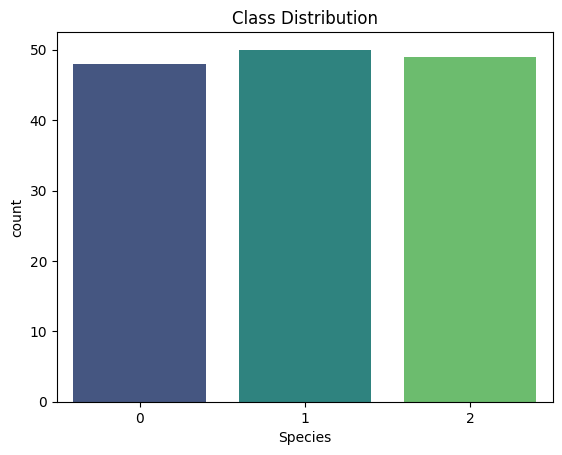

In [8]:
# Count the number of samples per species
sns.countplot(x=data['Species'], palette='viridis')
plt.title("Class Distribution")
plt.show()

Box Plot and Pair Plot in EDA
Both box plots and pair plots are important visualizations in Exploratory Data Analysis (EDA) to understand data distribution and relationships.

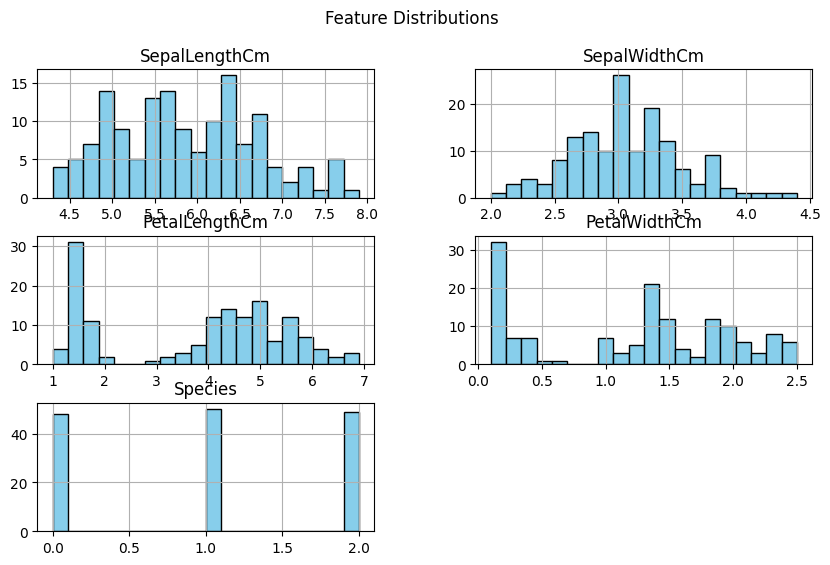

In [11]:
# Histogram for each feature
data.hist(figsize=(10, 6), bins=20, edgecolor='black', color='skyblue')
plt.suptitle("Feature Distributions")
plt.show()

# Box Plot & Pair Plot

Box Plot (Box-and-Whisker Plot)
A box plot helps visualize the distribution, central tendency, spread, and outliers in a dataset.

** Key Components of a Box Plot:
Median (Q2) – The middle value of the dataset.
Interquartile Range (IQR) – The range between Q1 (25th percentile) and Q3 (75th percentile).
Whiskers – Extend from Q1 to the lowest value and from Q3 to the highest value within 1.5 * IQR.
Outliers – Points beyond the whiskers (possible anomalies).

It does:
Each box represents the spread of values for a feature.
If a feature has outliers, they appear as individual points outside the whiskers.
Helps decide whether to remove or transform outliers.

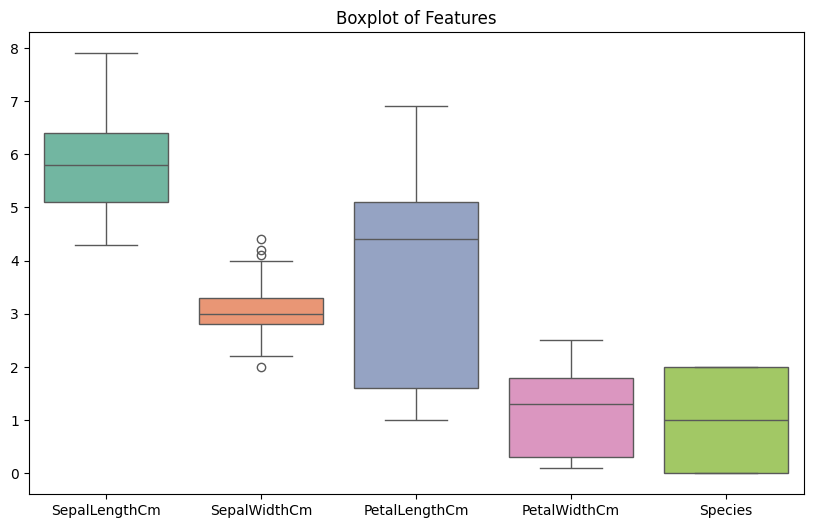

In [12]:
# Boxplot to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, palette='Set2')
plt.title("Boxplot of Features")
plt.show()

Pair Plot (Pairwise Scatter Plot)
A pair plot visualizes pairwise relationships between multiple numerical features.

 Why Use a Pair Plot?
Shows scatter plots for feature relationships.
Uses different colors for categories (if hue is provided).
Helps in identifying correlations, clusters, or trends.

It does:
Each scatter plot shows how two features are related.
The diagonal usually has histograms (or KDE plots).
Different species are color-coded to see class separability.

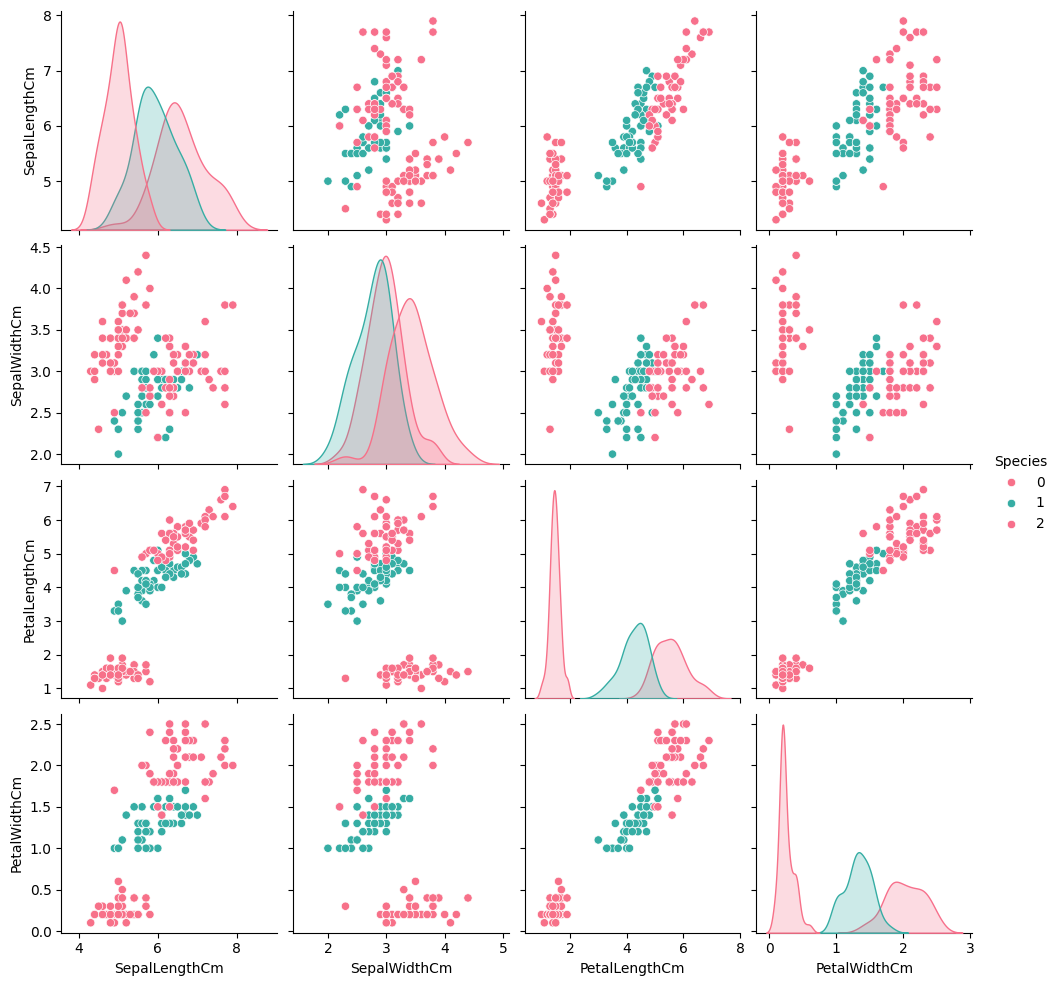

In [13]:
# Pairplot for feature relationships
sns.pairplot(data, hue="Species", palette='husl')
plt.show()

In [14]:
# Outlier Detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("Outliers in each column:")
print(outliers)

Outliers in each column:
SepalLengthCm    0
SepalWidthCm     4
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [15]:
# Remove outliers in SepalWidthCm based on IQR
Q1 = data["SepalWidthCm"].quantile(0.25)
Q3 = data["SepalWidthCm"].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data to remove outliers
data_cleaned = data[(data["SepalWidthCm"] >= lower_bound) & (data["SepalWidthCm"] <= upper_bound)]

print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")

Original data shape: (147, 5)
Cleaned data shape: (143, 5)


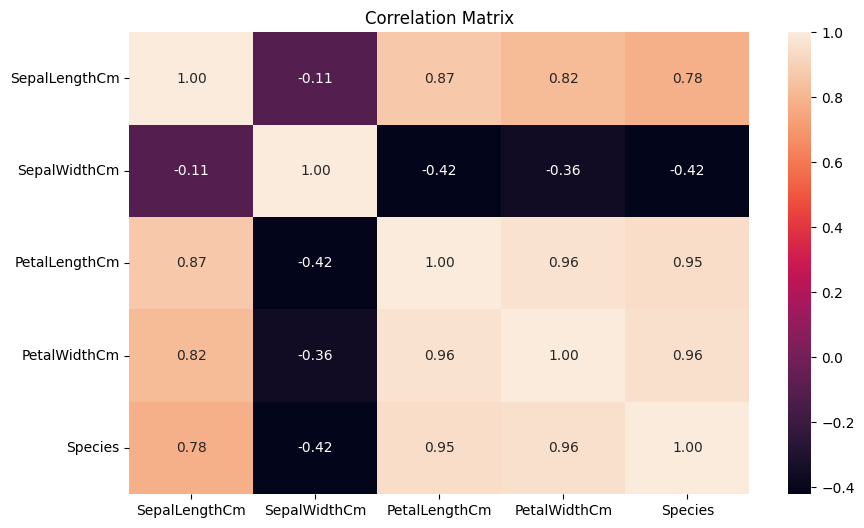

In [17]:
#Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [18]:
# Save cleaned dataset
cleaned_path = "/content/drive/MyDrive/Projects/IFC/cleaned_iris.csv"
data_cleaned.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")

Cleaned dataset saved to: /content/drive/MyDrive/Projects/IFC/cleaned_iris.csv
